### Importing Libraries and Dataset

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [76]:
housing = pd.read_csv("housing.csv")

### EDA

In [77]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [78]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [79]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [80]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

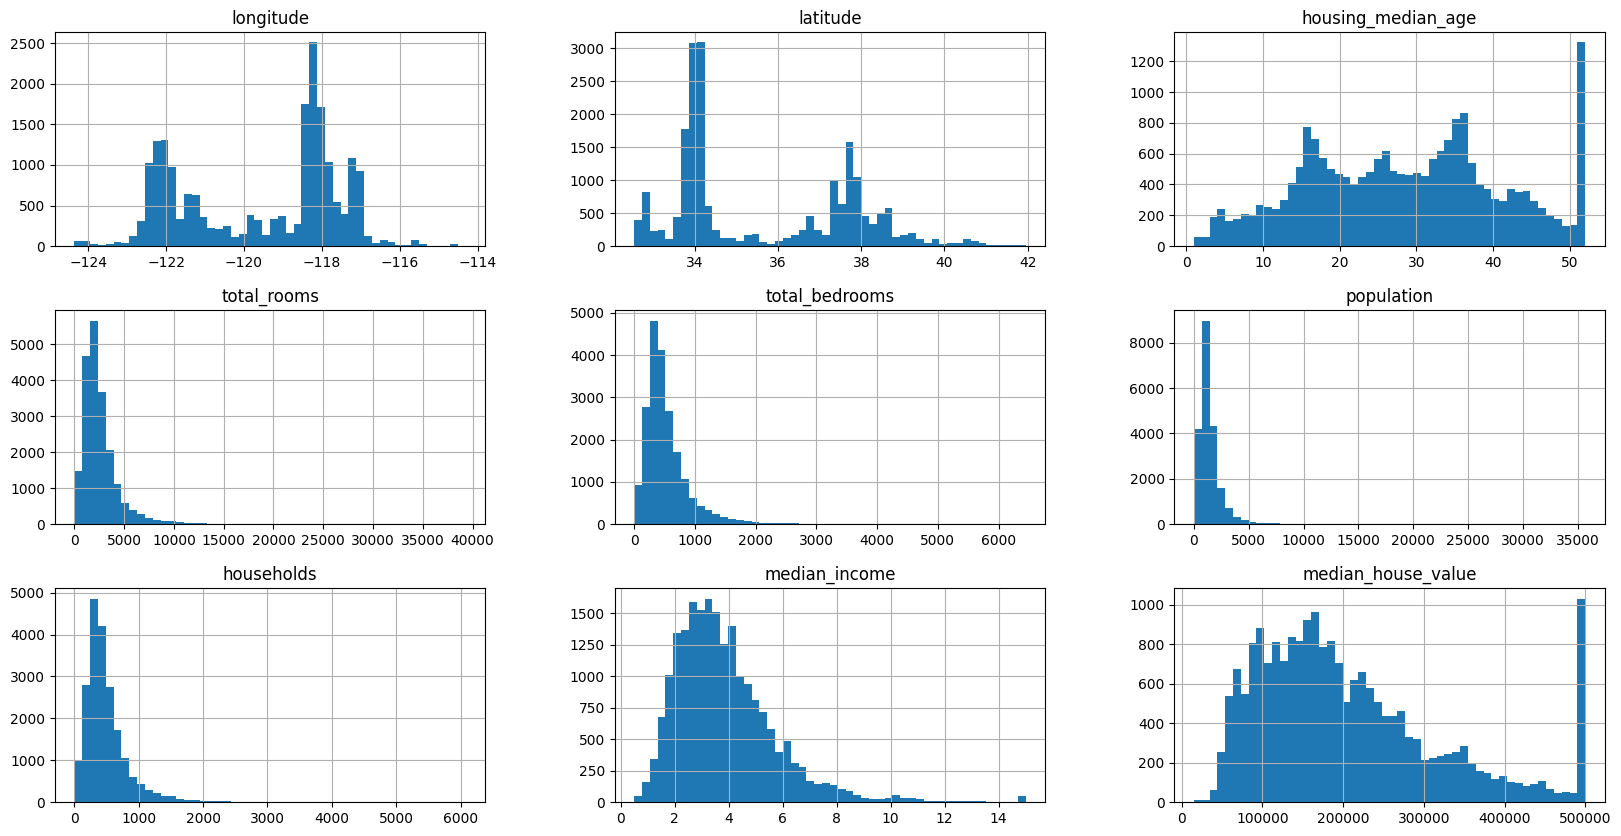

In [81]:
%matplotlib inline
housing.hist(bins=50, figsize=(20,10))

In [82]:
#Setting seed for reproducability
np.random.seed(42)

#Shuffle the indices of the dataset using np.random.permutation.
#Determine the training size
#Fetch training indices and testing indices
#Return the records using iloc and not the indices
def train_test_split(data, test_size_ratio):
    shuffleindices = np.random.permutation(len(data))
    train_size = int(len(data)*(1-test_size_ratio))
    train_indices = shuffleindices[:train_size]
    print(train_indices)
    test_indices = shuffleindices[train_size:]
    print(test_indices)
    return data.iloc[train_indices], data.iloc[test_indices]

In [83]:
train,test = train_test_split(housing,0.2)

[20046  3024 15663 ...  1051 14519 11410]
[ 9221 10234  4763 ...  5390   860 15795]


In [84]:
len(test)

4128

Categorizing the median income value for later Stratified sampling

In [85]:
#Median income is an important feature for median house value, hence we have to make sure that the proportion in the training
#and the testing sets are equal to the true proportion. Hence cutting the median income column into 5 categories and creating a
#new column "median_income_cat"
housing["median_income_cat"] = pd.cut(housing["median_income"], bins=[0.,1.5,3.,4.5,6.,np.inf], labels=[1,2,3,4,5])

<Axes: >

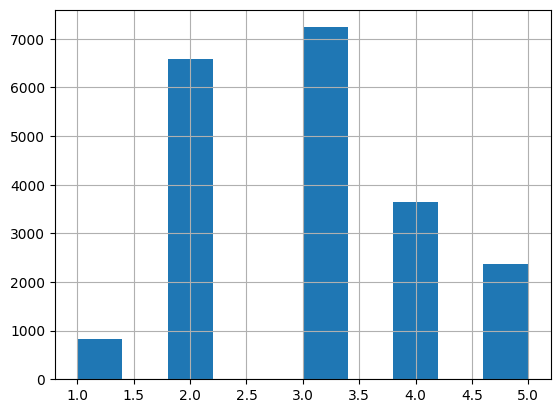

In [86]:
housing["median_income_cat"].hist()

Performing Stratified Sampling so that the sample data is representative

In [87]:
from sklearn.model_selection import StratifiedShuffleSplit

#We want to split the hosing dataset into 1 set of train and test set, hence n_split = 1. If n_split = 2, the split method will
#create 2 sets of train and test with a proportion of 0.8 in train and 0.2 test in both the sets.
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

#Fetching the indices for the training and testing set. split.split is a method for the above variable split and it demands the
#dataset to be split(housing) and what column to refer for stratified sampling(housing["median_income_cat"])
for train_index, test_index in split.split(housing, housing["median_income_cat"]):
    strat_train = housing.loc[train_index]
    strat_test = housing.loc[test_index]

In [88]:
#To see the proportion of each income category in the dataset
housing["median_income_cat"].value_counts() / len(housing)

median_income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [89]:
strat_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3


In [90]:
strat_train["median_income_cat"].value_counts() / len(strat_train)

median_income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [91]:
strat_test["median_income_cat"].value_counts() / len(strat_test)

median_income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

Looking at the proprtion of the housing dataset and the stratified training and test sets it is evident that proportions are matching. This is what we were trying to achieve.

In [92]:
#Removing the median_income_cat feature to make the dataset the same as before.
for x in (strat_train, strat_test):
    x.drop("median_income_cat", axis=1, inplace=True)

In [93]:
strat_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [94]:
housing = strat_train.copy()

### Data Visualization

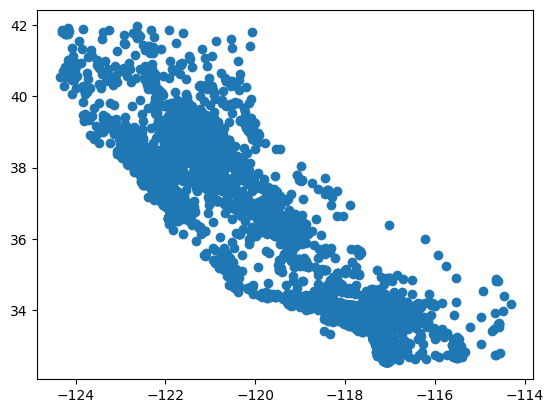

In [95]:
plt.scatter(housing["longitude"], housing["latitude"])

As seen above, it is difficult to see a pattern here.

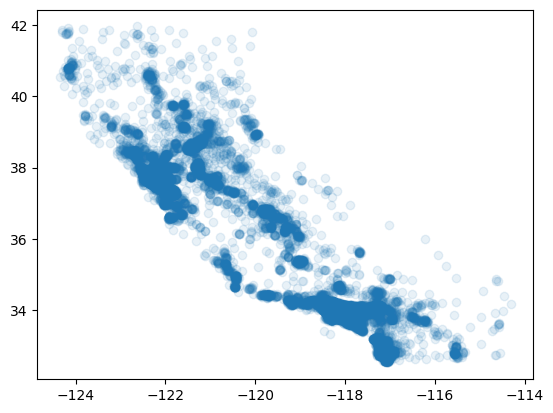

In [96]:
plt.scatter(housing["longitude"], housing["latitude"], alpha = 0.1)

Setting alpha to 0.1 helps us visualize data in a better way. We can see that the most of the districts are from bay area and a good number of districts in central part of california.

Now lets visualize data on the basis of the population size and our label "median_house_value".

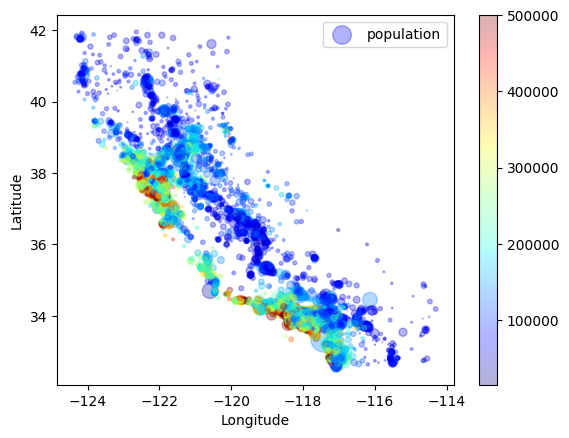

In [97]:
sc = plt.scatter(housing["longitude"], housing["latitude"], s = housing["population"]/100, c = housing["median_house_value"], label = "population", cmap= plt.get_cmap("jet"), alpha = 0.3)
plt.colorbar(sc)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()

It is visible that the houses in the bay areas are much more costlier(dots in red) compared to the houses elsewhere. But, in the northern bay areas, the median house prices tend to have a similar value to that of the houses in the central California.

In [98]:
#Correlation among features
correlation = housing.loc[:,housing.columns!="ocean_proximity"].corr()

In [99]:
correlation["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

As the Pearson's correlation coefficeint goes towards 1, there is a positive relationship among the feature(s) and the label(s) and vice versa. If a correlation coeff is closer to 0 that indicates no correlation

<Axes: >

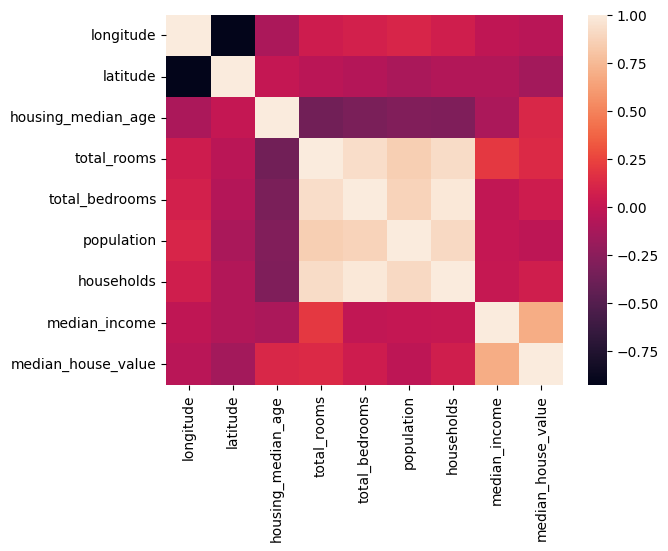

In [100]:
import seaborn as sns

sns.heatmap(correlation)

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

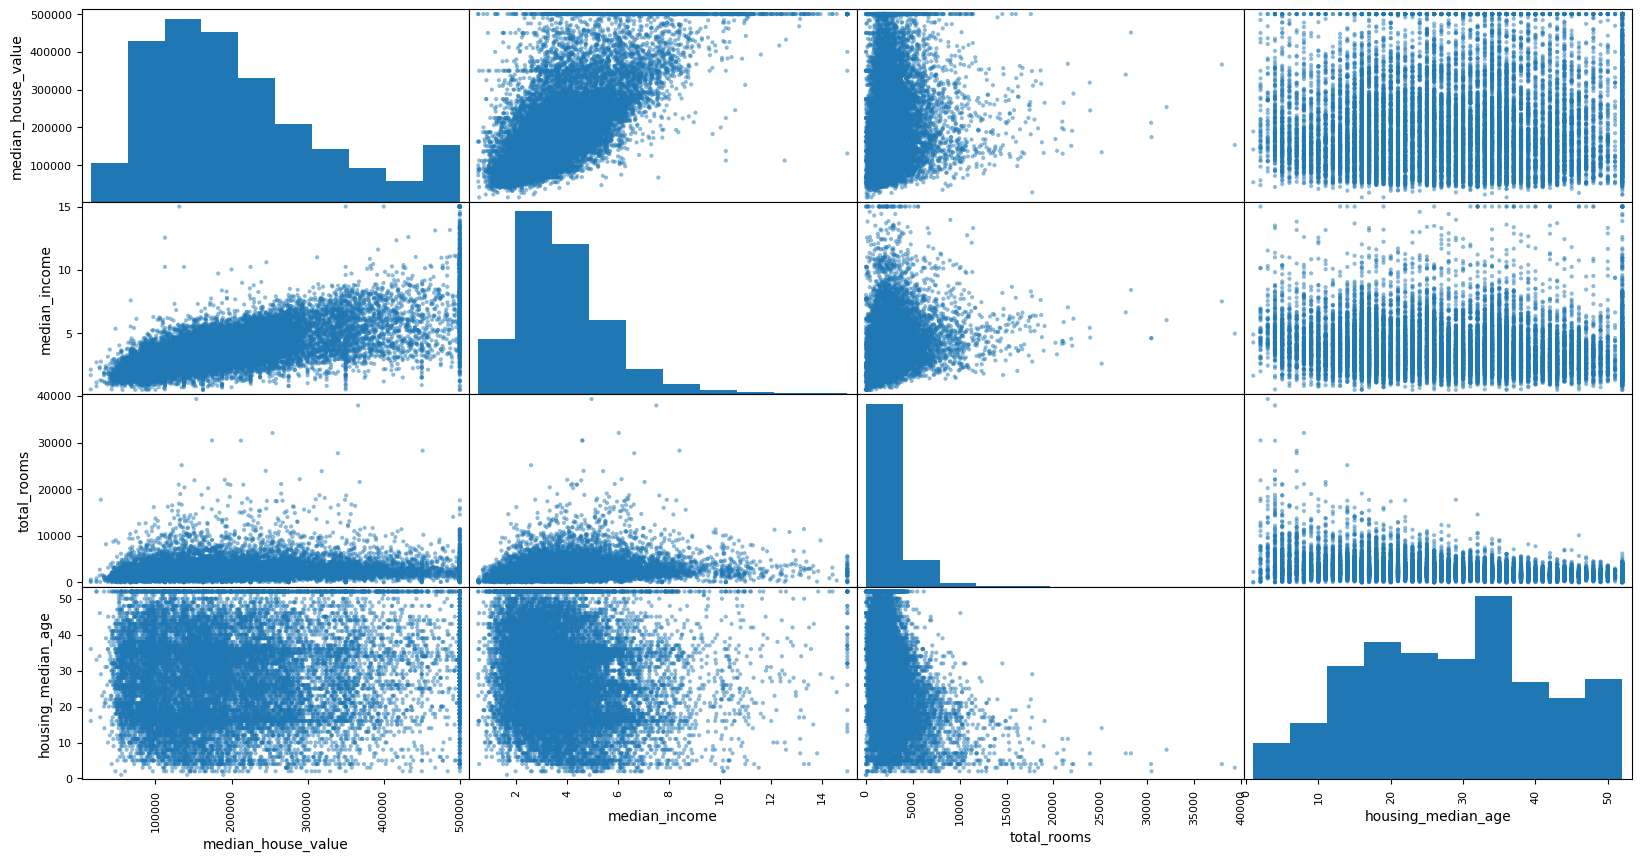

In [101]:
#Scatter matrix for correlation between every features. We'll use the positively correlated features
from pandas.plotting import scatter_matrix

scatter_matrix(housing[["median_house_value","median_income", "total_rooms", "housing_median_age"]], figsize=(20,10))

C:\Users\rijin\anaconda3\envs\ms\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


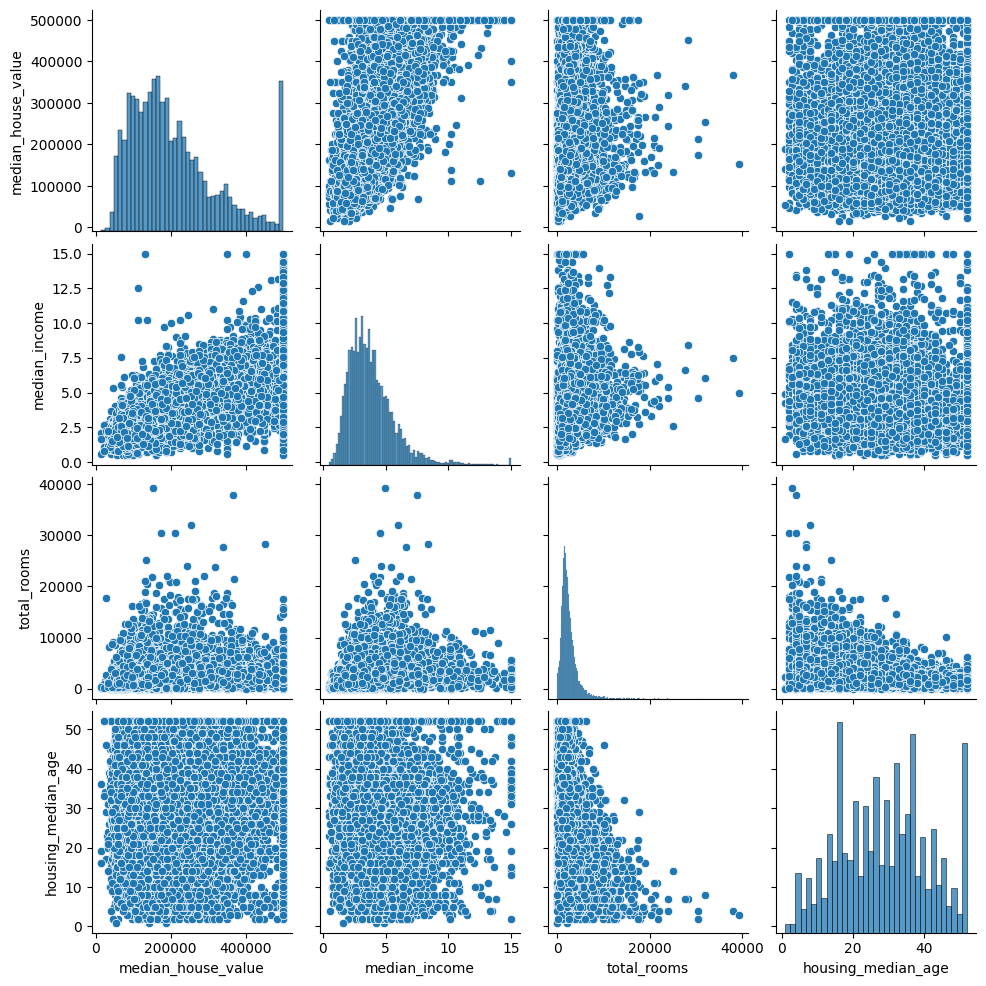

In [102]:
#Scatter matrix with seaborn
sns.pairplot(housing[["median_house_value","median_income", "total_rooms", "housing_median_age"]])

Median income is highly correlated with the target label. 

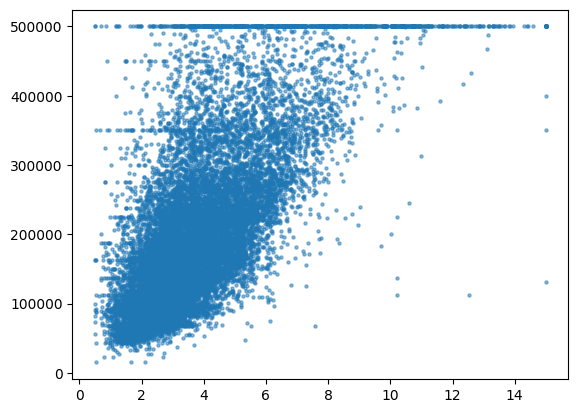

In [103]:
plt.scatter(housing["median_income"], housing["median_house_value"], s = 5, alpha=0.5)

#### Experimenting with attribute combinations
Features such as total rooms, total bedrooms can be of much more importance if we can get to know the total numer of bedrooms per rooms or total rooms per household.

In [104]:
housing["bedrooms_per_rooms"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [105]:
correlation = housing.loc[:,housing.columns!="ocean_proximity"].corr()

In [106]:
correlation["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_rooms         -0.259952
Name: median_house_value, dtype: float64

The calculated attribute "rooms_per_household" shows a positive correlation with the target label. It means, more the numbers of rooms then more the median house value. In contrast, bedrooms_per_rooms show a negative correlation to the target label. Less the no. bedrooms, more the price of the house.

#### Splitting the features and the label

In [107]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedrooms_per_rooms,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,0.205784,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,0.160714,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,0.191595,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,0.276505,3.886128,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,0.182692,6.096552,3.167241
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,0.184696,6.658342,2.023976
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,0.179977,5.571932,3.363188
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,0.234795,4.110465,2.662791
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,0.183835,6.297405,2.411178


In [108]:
housing = strat_train.drop("median_house_value", axis=1)
housing_target = strat_train["median_house_value"].copy()

### Data Cleaning

In [109]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

(array([4.629e+03, 7.311e+03, 2.641e+03, 9.070e+02, 4.140e+02, 1.980e+02,
        8.300e+01, 6.100e+01, 4.300e+01, 2.600e+01, 1.200e+01, 8.000e+00,
        5.000e+00, 6.000e+00, 4.000e+00, 2.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00]),
 array([2.0000e+00, 3.1240e+02, 6.2280e+02, 9.3320e+02, 1.2436e+03,
        1.5540e+03, 1.8644e+03, 2.1748e+03, 2.4852e+03, 2.7956e+03,
        3.1060e+03, 3.4164e+03, 3.7268e+03, 4.0372e+03, 4.3476e+03,
        4.6580e+03, 4.9684e+03, 5.2788e+03, 5.5892e+03, 5.8996e+03,
        6.2100e+03]),
 <BarContainer object of 20 artists>)

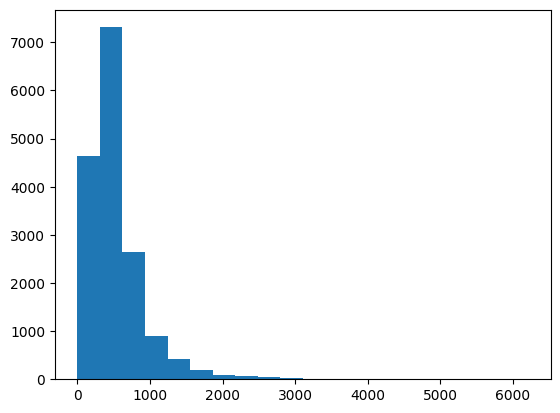

In [110]:
plt.hist(housing["total_bedrooms"], bins=20)

As the distribution is right skewed, it is wise to fill the na values with the attribute median.

Storing the median of the total bedrooms so that it can be utilized in the test set too.

In [111]:
total_bedrooms_median = housing["total_bedrooms"].median()
housing.fillna(total_bedrooms_median, inplace=True)

In [112]:
housing.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

Alternatively, scikits learn's SimpleImputer class can also be used to fill the null values

In [113]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
housing_no_cat = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_no_cat)
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

It is better to use simple imputer and calculate all the median values as it may be possible that the null values may exist in the production data and hence it can be transformed with the imputer instance we trained.

In [114]:
X = imputer.transform(housing_no_cat)

In [115]:
housing_tr = pd.DataFrame(X, columns=housing_no_cat.columns)

In [116]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


#### Handling Categorical values

There is a need to convert the categorical values to numbers as most of the ML algorithms work well with numbers and not with text data.

In [117]:
from sklearn.preprocessing import OneHotEncoder
housing_cat = housing[["ocean_proximity"]]
ohencoder = OneHotEncoder()
new_housing_cat = ohencoder.fit_transform(housing_cat)
new_housing_cat

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [118]:
new_housing_cat.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

#### Transformation Pipeline

In [119]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [120]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names]

In [121]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


In [122]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline= Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_no_cat)

In [123]:
housing_no_cat

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [124]:
from sklearn.compose import ColumnTransformer

num_attribute = list(housing_no_cat)
cat_attribute = ["ocean_proximity"]
num_attribute
full_pipeline = ColumnTransformer([
    ('num_tran', num_pipeline, num_attribute),
    ('cat_tran', OneHotEncoder(), cat_attribute)
]) 

housing_prepared = full_pipeline.fit_transform(housing)

In [125]:
pd.DataFrame(housing_prepared)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,0.017395,0.006223,-0.121122,0.0,1.0,0.0,0.0,0.0
1,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,0.569256,-0.040811,-0.810867,0.0,0.0,0.0,0.0,1.0
2,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,-0.018024,-0.075371,-0.338273,0.0,1.0,0.0,0.0,0.0
3,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,-0.595140,-0.106803,0.961205,0.0,0.0,0.0,0.0,1.0
4,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,0.251241,0.006109,-0.474513,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1.251711,-1.220505,-1.165333,1.890456,1.696862,0.543471,1.341519,0.637374,0.466353,-0.092580,-0.443846,1.0,0.0,0.0,0.0,0.0
16508,-0.921368,1.342761,-1.085806,2.468471,2.161816,3.002174,2.451492,-0.557509,0.050362,0.023024,-0.516065,0.0,1.0,0.0,0.0,0.0
16509,-1.570794,1.310018,1.538566,-0.895802,-0.895679,-0.862013,-0.865118,-0.365475,-0.509240,-0.037436,0.322869,1.0,0.0,0.0,0.0,0.0
16510,-1.560803,1.249211,-1.165333,0.249005,0.112126,-0.189747,0.010616,0.168261,0.328149,-0.059156,-0.457023,1.0,0.0,0.0,0.0,0.0


### Training the model

In [126]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(housing_prepared, housing_target)

LinearRegression()

In [137]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(housing_prepared)
mse = mean_squared_error(housing_target, predictions)
rmse = np.sqrt(mse)
rmse

68627.87390018745

The prediction error is of $68627. This may be due to underfitting. To solve this wither we need more data, or remove noises or try a more complex model that can find non linear relationships in the data. Log transformations can also be applied to achieve better results.

In [138]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(housing_prepared, housing_target)

DecisionTreeRegressor()

In [139]:
dt_predictions = dt.predict(housing_prepared)
dt_mse = mean_squared_error(housing_target, dt_predictions)
dt_rmse = np.sqrt(dt_mse)
dt_rmse

0.0

0 error! Means there is some sort of overfitting. It is not advisable to run the test set yet as it should be the final step.

### Cross Validation

In [140]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt, housing_prepared, housing_target, scoring="neg_mean_squared_error", cv=10)

dt_rmse_scores = np.sqrt(-scores)

In [141]:
print(dt_rmse_scores)
print(dt_rmse_scores.mean())
print(dt_rmse_scores.std())

[72251.22610062 70811.34799853 68000.08591434 71929.39104752
 69328.61392367 77963.99482744 71628.79228943 73511.78648072
 69045.58722762 69854.4073967 ]
71432.52332065887
2696.6824522410743


The mean RMSE score for the cross validation is around $71432 which is worse than linear regression. This is an example of the model overfitting on the training set.

Let's try cross validation for Linear Regression

In [ ]:
lin_scores = cross_val_score(model, housing_prepared, housing_target, scoring="neg_mean_squared_error", cv=10)


In [147]:
lin_scores_rmse = np.sqrt(-lin_scores)

In [148]:
def display_scores(score):
    print("Scores: ",score)
    print("Mean:",score.mean())
    print("Standard Deviation",score.std())
    
display_scores(lin_scores_rmse)

Scores:  [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard Deviation 2880.328209818065


It is almost the same as before, but the error is better than decision trees.

In [149]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(housing_prepared, housing_target)

RandomForestRegressor(random_state=42)

In [150]:
rf_prediction = rf.predict(housing_prepared)
rf_mse = mean_squared_error(housing_target, rf_prediction)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

18650.698705770003

Looks much better than both the previously used algorithms. Let's cross validate

In [154]:
rf_scores = cross_val_score(rf, housing_prepared, housing_target, scoring="neg_mean_squared_error", cv=10)

In [155]:
rf_rmse_score = np.sqrt(-rf_scores)

In [156]:
display_scores(rf_rmse_score)

Scores:  [51559.63379638 48737.57100062 47210.51269766 51875.21247297
 47577.50470123 51863.27467888 52746.34645573 50065.1762751
 48664.66818196 54055.90894609]
Mean: 50435.58092066179
Standard Deviation 2203.3381412764606


The mean RMSE is $50435